<a href="https://colab.research.google.com/github/DineshSiddhartha/DataScience-Project/blob/main/Amazon_Product_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ratings_Electronics.csv', header=None)
df.columns = ['user_id', 'prod_id', 'rating', 'timestamp']
df = df.drop('timestamp', axis=1)
df_copy = df.copy(deep=True)

In [ ]:
df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [ ]:
rows, columns = df.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  7824482
No of columns:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [ ]:
df.isna().sum()

,0
user_id,0
prod_id,0
rating,0


In [ ]:
df['rating'].describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


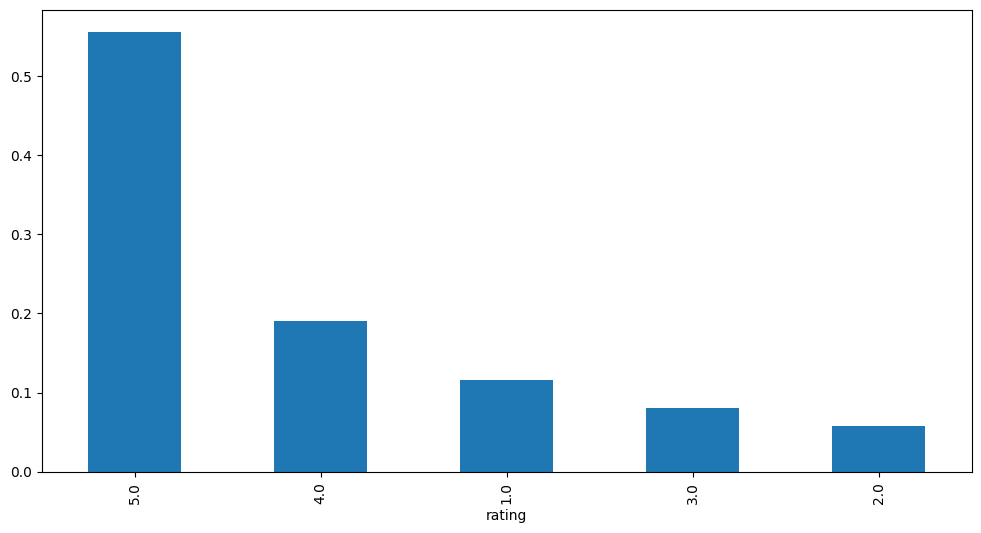

In [ ]:
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [ ]:
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['prod_id'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


In [ ]:
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:100]
most_rated

,0
user_id,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
...,...
A3W4D8XOGLWUN5,153
A17HMM1M7T9PJ1,151
A32O5FZH994CNY,151


In [ ]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]

In [ ]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['prod_id'].nunique())

The number of observations in the final data = 125871
Number of unique USERS in the final data =  1540
Number of unique PRODUCTS in the final data =  48190


In [ ]:
final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))
final_ratings_matrix.head()

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
average_rating = df_final.groupby('prod_id')['rating'].mean()
count_rating = df_final.groupby('prod_id')['rating'].count()
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})
final_rating.head()


,avg_rating,rating_count
prod_id,,
1400699169,5.0,1
B00LKG1MC8,5.0,1
0594451647,5.0,1
1685560148,5.0,1
B00LGQ6HL8,5.0,5


In [ ]:
def top_n_products(final_rating, n, min_interaction):
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

In [ ]:
list(top_n_products(final_rating, 100, 50))

['B001TH7GUU',
 'B003ES5ZUU',
 'B0019EHU8G',
 'B006W8U2MU',
 'B000QUUFRW',
 'B000HPV3RW',
 'B001TH7GSW',
 'B000BQ7GW8',
 'B000N99BBC',
 'B002WE6D44',
 'B0082E9K7U',
 'B00G4UQ6U8',
 'B000VX6XL6',
 'B00BOHNYU6',
 'B007WTAJTO',
 'B002V88HFE',
 'B002WE4HE2',
 'B009NHWVIA',
 'B00BOHNYTW',
 'B004CLYEDC',
 'B004Q3R9AQ',
 'B00834SJSK',
 'B0034CL2ZI',
 'B000JMJWV2',
 'B004CLYEFK',
 'B000JE7GPY',
 'B001E1Y5O6',
 'B0002L5R78',
 'B001TOD7ME',
 'B00829TIA4',
 'B0079UAT0A',
 'B00HFRWWAM',
 'B00834SJNA',
 'B004CLYEH8',
 'B0081FLFQE',
 'B005FYNSPK',
 'B009SYZ8OC',
 'B005HMKKH4',
 'B000LRMS66',
 'B004GUT1QO',
 'B00829TIEK',
 'B0074BW614',
 'B0041Q38NU',
 'B00007E7JU',
 'B00829THK0',
 'B00829THEG',
 'B003M0NURK',
 'B001XURP7W',
 'B000Q8UAWY',
 'B005DKZTMG',
 'B005CT56F8',
 'B00BGGDVOO',
 'B004CLYEE6',
 'B002QEBMAK',
 'B004QK7HI8',
 'B00004ZCJE',
 'B0015DYMVO',
 'B002SZEOLG',
 'B0088CJT4U',
 'B0097CXWUW',
 'B005CLPP84',
 'B00884WH74',
 'B0063705PE',
 'B0097CZHAU',
 'B00AQRUW4Q',
 'B002R5AM7C',
 'B008DWCR

In [ ]:

list(top_n_products(final_rating, 100, 100))

['B003ES5ZUU',
 'B000N99BBC',
 'B007WTAJTO',
 'B002V88HFE',
 'B004CLYEDC',
 'B00834SJSK',
 'B0034CL2ZI',
 'B00834SJNA',
 'B00829TIEK',
 'B00829THK0',
 'B002SZEOLG',
 'B0088CJT4U',
 'B002R5AM7C',
 'B008DWCRQW',
 'B004T9RR6I']

In [ ]:
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

In [ ]:
similar = similar_users(3,final_ratings_matrix)[0][0:100]
similar

[320,
 12,
 793,
 261,
 156,
 1493,
 1250,
 567,
 753,
 1360,
 370,
 1006,
 1196,
 1228,
 458,
 871,
 579,
 1257,
 713,
 1537,
 1431,
 54,
 231,
 380,
 587,
 41,
 1485,
 1530,
 791,
 693,
 582,
 848,
 1127,
 1500,
 779,
 1052,
 1478,
 291,
 139,
 1522,
 641,
 1004,
 413,
 1121,
 107,
 1013,
 109,
 726,
 1363,
 224,
 643,
 1309,
 1348,
 339,
 846,
 1117,
 97,
 125,
 108,
 1483,
 488,
 839,
 534,
 282,
 1316,
 1330,
 1284,
 663,
 666,
 760,
 614,
 53,
 913,
 1307,
 45,
 762,
 1047,
 267,
 438,
 1086,
 68,
 1072,
 391,
 1209,
 1408,
 1259,
 686,
 659,
 825,
 66,
 1150,
 689,
 13,
 1192,
 319,
 775,
 611,
 448,
 145,
 1094]

In [ ]:
similar_users(3,final_ratings_matrix)[1][0:100]

[array([[0.05662371]]),
 array([[0.05549645]]),
 array([[0.05098326]]),
 array([[0.05024185]]),
 array([[0.05003874]]),
 array([[0.04930111]]),
 array([[0.04889354]]),
 array([[0.04672744]]),
 array([[0.04637283]]),
 array([[0.04492668]]),
 array([[0.04431712]]),
 array([[0.04350929]]),
 array([[0.04337982]]),
 array([[0.04292358]]),
 array([[0.04288564]]),
 array([[0.04239103]]),
 array([[0.04059016]]),
 array([[0.04028041]]),
 array([[0.04022923]]),
 array([[0.04021196]]),
 array([[0.03833524]]),
 array([[0.03818945]]),
 array([[0.03748836]]),
 array([[0.03739774]]),
 array([[0.0372013]]),
 array([[0.03681752]]),
 array([[0.03678215]]),
 array([[0.03596998]]),
 array([[0.03574455]]),
 array([[0.03538636]]),
 array([[0.03479329]]),
 array([[0.03451991]]),
 array([[0.03438237]]),
 array([[0.0341701]]),
 array([[0.03393592]]),
 array([[0.03315896]]),
 array([[0.03310394]]),
 array([[0.03300477]]),
 array([[0.0329223]]),
 array([[0.03258082]]),
 array([[0.03225492]]),
 array([[0.03177555

In [ ]:
similar = similar_users(1521, final_ratings_matrix)[0][0:100]
similar

[991,
 1065,
 1012,
 1402,
 1371,
 1278,
 1518,
 692,
 785,
 161,
 333,
 1355,
 275,
 457,
 429,
 881,
 192,
 911,
 404,
 939,
 1435,
 1331,
 1085,
 1075,
 369,
 1062,
 996,
 1351,
 541,
 408,
 1242,
 1116,
 1295,
 1176,
 139,
 335,
 1483,
 1144,
 1109,
 1342,
 640,
 392,
 466,
 896,
 635,
 1420,
 633,
 422,
 1026,
 1291,
 86,
 1152,
 870,
 1323,
 134,
 535,
 992,
 877,
 110,
 1522,
 1528,
 19,
 1190,
 816,
 111,
 971,
 1004,
 622,
 442,
 223,
 157,
 1173,
 1024,
 857,
 2,
 140,
 1513,
 279,
 1502,
 1209,
 1459,
 766,
 527,
 1038,
 118,
 1157,
 845,
 142,
 985,
 1408,
 1153,
 1248,
 1527,
 317,
 177,
 479,
 1314,
 710,
 394,
 1057]

In [ ]:
%%time
#Print the similarity score
similar_users(1521,final_ratings_matrix)[1][0:100]

CPU times: user 5.89 s, sys: 5.46 ms, total: 5.89 s
Wall time: 4.42 s


[array([[0.10889304]]),
 array([[0.10538068]]),
 array([[0.1026758]]),
 array([[0.09418291]]),
 array([[0.09149062]]),
 array([[0.09135361]]),
 array([[0.09028898]]),
 array([[0.08735684]]),
 array([[0.08673386]]),
 array([[0.08478815]]),
 array([[0.08410022]]),
 array([[0.0824549]]),
 array([[0.07935479]]),
 array([[0.07892976]]),
 array([[0.07763106]]),
 array([[0.07577953]]),
 array([[0.07543748]]),
 array([[0.07479837]]),
 array([[0.07458159]]),
 array([[0.07340516]]),
 array([[0.07246874]]),
 array([[0.07218155]]),
 array([[0.07205118]]),
 array([[0.07154887]]),
 array([[0.07153618]]),
 array([[0.07012678]]),
 array([[0.06853479]]),
 array([[0.06835726]]),
 array([[0.06805544]]),
 array([[0.06798282]]),
 array([[0.06756408]]),
 array([[0.06720074]]),
 array([[0.06633616]]),
 array([[0.06596408]]),
 array([[0.06578424]]),
 array([[0.06569256]]),
 array([[0.06564331]]),
 array([[0.06473069]]),
 array([[0.06459853]]),
 array([[0.06407848]]),
 array([[0.0632654]]),
 array([[0.06268153

In [ ]:
def recommendations(user_index, num_of_products, interactions_matrix):
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

In [ ]:
recommendations(1,100,final_ratings_matrix)

['B00CQ35C1Q',
 'B004D8MJ68',
 'B002WE4HE2',
 'B0093H4VSS',
 'B000UN8MKM',
 'B004PBLR3O',
 'B0009ZF7ZY',
 'B005GGTTZ0',
 'B00CHT6CRC',
 'B00DR8LAE2',
 'B004XZMCAY',
 'B005X9XVNQ',
 'B002UNMWDS',
 'B00077AA5Q',
 'B004N6259G',
 'B00DQZSIW8',
 'B00187VSLY',
 'B000EZP1Y6',
 'B001BM5XB2',
 'B005TDWVQY',
 'B009AR2MQO',
 'B0011TM19C',
 'B00D5Q75RC',
 'B0074FGMEW',
 'B00E9YIFKA',
 'B004NY9UV4',
 'B003Z6Q2JE',
 'B001TK3ACA',
 'B000N99BBC',
 'B001M5KI90',
 'B001SEL36M',
 'B002NU6M5M',
 'B003FMVPFY',
 'B006SVV6HG',
 'B00DIFIM36',
 'B00DQZNWNI',
 'B00DULMXTW',
 'B001W9Y4PK',
 'B004YQX0SK',
 'B0014175NE',
 'B00B7N9CWG',
 'B0039BPG1A',
 'B00067TL1Q',
 'B00000JDF5',
 'B005TDWY4I',
 'B001W0Y440',
 'B00DQZTS8Q',
 'B000OGA7YO',
 'B007X3VC7W',
 'B001TODUXA',
 'B00JJWH3PU',
 'B001415FZY',
 'B008ULPCB8',
 'B000CRFOMK',
 'B007KFLV9W',
 'B0027FGW3K',
 'B008X9Z3UC',
 'B0007MXZB2',
 'B000N2OBWS',
 'B001BKV06G',
 'B004D98WMW',
 'B004R929AY',
 'B007H3L24Q',
 'B00305D9K0',
 'B008R39DZK',
 'B00EIF0E0Y',
 'B004CZ9U

In [ ]:
%%time
recommendations(1521,100,final_ratings_matrix)

CPU times: user 4.92 s, sys: 7.4 ms, total: 4.93 s
Wall time: 3.22 s


['B0079TOEQQ',
 'B002P8M4IQ',
 'B0076POAPS',
 'B007X3VEUW',
 'B007FZN53W',
 'B004SNCZ3K',
 'B00F1CRTLK',
 'B005TDWUII',
 'B005UA65YK',
 'B005LIDMYM',
 'B006OZEIKS',
 'B0040YFPSO',
 'B004T9RR6I',
 'B00A7PPLP2',
 'B001DZVS52',
 'B004MF11MU',
 'B0035JJJQE',
 'B0080EBMM8',
 'B005LIDN14',
 'B008X9ZDGG',
 'B003YBUSMW',
 'B007BY0MIS',
 'B006GDTTM0',
 'B007XOQUY6',
 'B0034CL2ZI',
 'B008DWCRQW',
 'B005I6EU48',
 'B009O7XGCY',
 'B00CF5OHZ2',
 'B00DQZQG3G',
 'B0040XQ7PK',
 'B00G4FCKB2',
 'B008ULPA2O',
 'B008ULPD0S',
 'B007WVA2PI',
 'B00A6UYCT4',
 'B002L6GEKG',
 'B005OB1TU0',
 'B008X9Z44M',
 'B0028AD7BE',
 'B002FB684E',
 'B00EU9V3S0',
 'B008ULPE70',
 'B00EHZYWGM',
 'B00AWLCIO8',
 'B009T0NLYO',
 'B009O7XUL6',
 'B0055NQWZE',
 'B003IT6YFU',
 'B00HRQB28Y',
 'B00EOI2TD0',
 'B0044WWLW0',
 'B002YCIN9W',
 'B00E6ONJJU',
 'B001TOD7ME',
 'B008X9ZBVI',
 'B009O7XUU2',
 'B00E5UHRIO',
 'B0057UUB1G',
 'B009T0NM0M',
 'B005QCDY50',
 'B008X9Z7N0',
 'B009O7XO8U',
 'B00A7FS3AW',
 'B00DQZT0AC',
 'B004LB4MZS',
 'B00A3YDT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def correlation_similarity(u, v):
    if len(u) != len(v) or len(u) < 2:
        return 0
    with np.errstate(invalid='ignore'):
        corr = np.corrcoef(u, v)[0,1]
    return np.nan_to_num(corr, nan=0.0)

def similar_users(user_index, interactions_matrix, similarity_metric='cosine'):
    metrics = {
        'cosine': lambda u, v: cosine_similarity([u], [v])[0][0],
        'relu-cosine': lambda u, v: max(0, cosine_similarity([u], [v])[0][0]),
        'tanh-dot': lambda u, v: np.tanh(np.dot(u, v)),
        'inverse-hyperbolic': lambda u, v: np.arctanh(
            np.clip(cosine_similarity([u], [v])[0][0], -0.999, 0.999)
        ),
        'norm-contrast': lambda u, v: (
            cosine_similarity([u], [v])[0][0] -
            abs(np.linalg.norm(u) - np.linalg.norm(v))
        ),
        'sigmoid-projected': lambda u, v: 1/(1 + np.exp(-np.dot(u, v))),
        'correlation': correlation_similarity
    }
    if similarity_metric not in metrics:
        raise ValueError(f"Invalid metric. Choose from {list(metrics.keys())}")

    target = interactions_matrix.loc[user_index].values
    similarities = []

    for user in interactions_matrix.index:
        if user == user_index:
            continue
        vector = interactions_matrix.loc[user].values
        sim = metrics[similarity_metric](target, vector)
        similarities.append((user, sim))
    similarities.sort(key=lambda x: x[1], reverse=True)

    return (
        [u[0] for u in similarities],
        [u[1] for u in similarities]
    )


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [ ]:
import random
target_user_id = random.choice(final_ratings_matrix.index.tolist())
print(f"Target user selected: {target_user_id}")
for metric in [
    'cosine', 'relu-cosine', 'tanh-dot',
    'inverse-hyperbolic', 'norm-contrast', 'sigmoid-projected', 'correlation'
]:
    try:
        users, scores = similar_users(target_user_id, final_ratings_matrix, similarity_metric=metric)
        print(f"\nTop 10 similar users for metric '{metric}':")
        for u, s in zip(users[:100], scores[:100]):
            print(f"User {u}, Score: {s:.4f}")
    except Exception as e:
        print(f"Error using metric '{metric}': {e}")


Target user selected: 625

Top 10 similar users for metric 'cosine':
User 541, Score: 0.0702
User 1464, Score: 0.0589
User 51, Score: 0.0562
User 101, Score: 0.0527
User 267, Score: 0.0523
User 0, Score: 0.0519
User 1331, Score: 0.0492
User 652, Score: 0.0469
User 873, Score: 0.0467
User 698, Score: 0.0443
User 792, Score: 0.0437
User 150, Score: 0.0437
User 1466, Score: 0.0427
User 1452, Score: 0.0427
User 1019, Score: 0.0422
User 893, Score: 0.0419
User 1220, Score: 0.0415
User 1303, Score: 0.0405
User 891, Score: 0.0404
User 505, Score: 0.0401
User 925, Score: 0.0398
User 465, Score: 0.0391
User 775, Score: 0.0391
User 488, Score: 0.0387
User 981, Score: 0.0382
User 567, Score: 0.0362
User 1231, Score: 0.0361
User 475, Score: 0.0357
User 562, Score: 0.0350
User 1009, Score: 0.0349
User 1400, Score: 0.0345
User 187, Score: 0.0342
User 142, Score: 0.0341
User 1103, Score: 0.0340
User 384, Score: 0.0339
User 539, Score: 0.0337
User 114, Score: 0.0337
User 1021, Score: 0.0337
User 462, 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
import random
def cosine_sim(u, v):
    return cosine_similarity([u], [v])[0][0]

def relu_cosine(u, v):
    return max(0, cosine_sim(u, v))

def tanh_dot(u, v):
    return np.tanh(np.dot(u, v))

def inverse_hyperbolic(u, v):
    return np.arctanh(np.clip(cosine_sim(u, v), -0.999, 0.999))

def norm_contrast(u, v):
    return cosine_sim(u, v) - abs(np.linalg.norm(u) - np.linalg.norm(v))

def sigmoid_projected(u, v):
    return 1/(1 + np.exp(-np.dot(u, v)))

def correlation_similarity(u, v):
    if len(u) != len(v) or len(u) < 2: return 0
    with np.errstate(invalid='ignore'):
        return np.nan_to_num(np.corrcoef(u, v)[0,1], nan=0.0)
def get_recommendations(user_index, df, metrics, top_n=200):
    recommendations = {}
    target = df.loc[user_index].values

    for metric_name, metric_func in metrics.items():
        similarities = []
        for other_user in df.index:
            if other_user == user_index: continue
            vector = df.loc[other_user].values
            try: sim = metric_func(target, vector)
            except: sim = 0
            similarities.append((other_user, sim))
        similarities.sort(key=lambda x: x[1], reverse=True)
        recommendations[metric_name] = [x[0] for x in similarities[:top_n]]

    return recommendations
def compare_to_cosine(recommendations, top_n=200):
    cosine_recs = recommendations['cosine']
    results = {}

    for metric, recs in recommendations.items():
        if metric == 'cosine': continue
        overlap = len(set(cosine_recs).intersection(recs))
        overlap_ratio = overlap / top_n
        common = list(set(cosine_recs).intersection(recs))
        if len(common) > 1:
            cosine_ranks = {user: idx for idx, user in enumerate(cosine_recs)}
            metric_ranks = {user: idx for idx, user in enumerate(recs)}
            corr, _ = spearmanr(
                [cosine_ranks[u] for u in common],
                [metric_ranks[u] for u in common]
            )
        else:
            corr = np.nan

        results[metric] = {
            'overlap': overlap,
            'overlap_ratio': overlap_ratio,
            'spearman': corr
        }

    return results

if __name__ == "__main__":
    METRICS = {
        'cosine': cosine_sim,
        'relu-cosine': relu_cosine,
        'tanh-dot': tanh_dot,
        'inverse-hyperbolic': inverse_hyperbolic,
        'norm-contrast': norm_contrast,
        'sigmoid-projected': sigmoid_projected,
        'correlation': correlation_similarity
    }
    final_ratings_matrix = pd.DataFrame(
        np.random.randint(0, 5, (1000, 50)),
        index=[f"User_{i}" for i in range(1000)],
        columns=[f"Item_{j}" for j in range(50)]
    )
    target_user = random.choice(final_ratings_matrix.index.tolist())
    print(f"Analyzing recommendations for: {target_user}")
    recommendations = get_recommendations(target_user, final_ratings_matrix, METRICS)
    comparison = compare_to_cosine(recommendations)

    print("\nComparison to Cosine Similarity:")
    print(f"{'Metric':<20} {'Overlap':<100} {'Overlap %':<100} {'Spearman':<100}")
    print("-" * 50)
    for metric, data in comparison.items():
        print(f"{metric:<20} {data['overlap']:<100} {data['overlap_ratio']:.2%}     {data['spearman']:.3f}")
    print("\nSample Recommendations (Top 100):")
    for metric, recs in recommendations.items():
        print(f"\n{metric}:")
        for idx, user in enumerate(recs[:100], 1):
            print(f"{idx:2}. {user}")


Analyzing recommendations for: User_525

Comparison to Cosine Similarity:
Metric               Overlap                                                                                              Overlap %                                                                                            Spearman                                                                                            
--------------------------------------------------
relu-cosine          200                                                                                                  100.00%     1.000
tanh-dot             40                                                                                                   20.00%     -0.152
inverse-hyperbolic   200                                                                                                  100.00%     1.000
norm-contrast        46                                                                                                   23.00%   